In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

# Configuring default figure size
sns.set(rc={"figure.figsize": (12, 6)})

# Enabling autocorrect in the notebook environment
%config Completer.use_jedi = False

# Show only 2 decimals for floating point numbers
pd.options.display.float_format = "{:.2f}".format

sns.set_style('whitegrid')

# Data Preprocessing and Cleaning

In [2]:
btc_data = pd.read_csv('/Users/poojan/Desktop/EDA Data/btcusd.csv')
btc_data.head()

,time,open,close,high,low,volume
0,1364774820000,93.25,93.30,93.30,93.25,93.30
1,1364774880000,100.00,100.00,100.00,100.00,93.30
2,1364774940000,93.30,93.30,93.30,93.30,33.68
3,1364775060000,93.35,93.47,93.47,93.35,20.00
4,1364775120000,93.47,93.47,93.47,93.47,2.02


In [3]:
btc_data.tail()

,time,open,close,high,low,volume
3420453,1625935920000,34089.00,34077.00,34091.00,34077.00,0.26
3420454,1625935980000,34074.00,34068.00,34074.00,34066.00,0.25
3420455,1625936040000,34066.69,34066.00,34068.00,34066.00,0.63
3420456,1625936100000,34067.00,34066.00,34067.00,34066.00,1.02
3420457,1625936160000,34066.00,34017.52,34066.00,34017.00,1.79


In [4]:
btc_data.shape

(3420458, 6)

As seen in the cell above, we can see that there are 3420458 data points for Bitcoin(designated by ticker symbol btcusd). It can be noticed that the values in the time column are in an unwanted format. We can clean it up using the following method.

In [38]:
btc_data['time'] = pd.to_datetime(btc_data['time'], unit='ms')
btc_data['date'] = btc_data['time'].astype(str).str.slice(0, 10)
btc_data.head()

,time,open,close,high,low,volume,date
0,2013-04-01 00:07:00,93.25,93.30,93.30,93.25,93.30,2013-04-01
1,2013-04-01 00:08:00,100.00,100.00,100.00,100.00,93.30,2013-04-01
2,2013-04-01 00:09:00,93.30,93.30,93.30,93.30,33.68,2013-04-01
3,2013-04-01 00:11:00,93.35,93.47,93.47,93.35,20.00,2013-04-01
4,2013-04-01 00:12:00,93.47,93.47,93.47,93.47,2.02,2013-04-01


In [39]:
btc_data.tail()

,time,open,close,high,low,volume,date
3420453,2021-07-10 16:52:00,34089.00,34077.00,34091.00,34077.00,0.26,2021-07-10
3420454,2021-07-10 16:53:00,34074.00,34068.00,34074.00,34066.00,0.25,2021-07-10
3420455,2021-07-10 16:54:00,34066.69,34066.00,34068.00,34066.00,0.63,2021-07-10
3420456,2021-07-10 16:55:00,34067.00,34066.00,34067.00,34066.00,1.02,2021-07-10
3420457,2021-07-10 16:56:00,34066.00,34017.52,34066.00,34017.00,1.79,2021-07-10


We can see that the entries range from date 4/1/2013 to 7/10/2021, which gives us sizable data to train our model.

In [40]:
btc_data.isna().sum()

time      0
open      0
close     0
high      0
low       0
volume    0
date      0
dtype: int64

As shown above, the data contains no null values

In [41]:
btc_data['Currency Name'] = 'Bitcoin'
btc_data.head()

,time,open,close,high,low,volume,date,Currency Name
0,2013-04-01 00:07:00,93.25,93.30,93.30,93.25,93.30,2013-04-01,Bitcoin
1,2013-04-01 00:08:00,100.00,100.00,100.00,100.00,93.30,2013-04-01,Bitcoin
2,2013-04-01 00:09:00,93.30,93.30,93.30,93.30,33.68,2013-04-01,Bitcoin
3,2013-04-01 00:11:00,93.35,93.47,93.47,93.35,20.00,2013-04-01,Bitcoin
4,2013-04-01 00:12:00,93.47,93.47,93.47,93.47,2.02,2013-04-01,Bitcoin


Similarly, looking at the transformed data for other cryptocurrencies we are interested in, i.e, Uniswap(UNIUSD), Cardano(ADAUSD), Ripple(XRPUSD), ethereum (ETHUSD)

First, looking at Uniswap data

In [44]:
uniusd_data = pd.read_csv('/Users/poojan/Desktop/EDA Data/uniusd.csv')
uniusd_data['time'] = pd.to_datetime(uniusd_data['time'])
uniusd_data['date'] = uniusd_data['time'].astype(str).str.slice(0, 10)
uniusd_data['Currency Name'] = 'Uniswap'
uniusd_data = uniusd_data.loc[:, ~uniusd_data.columns.str.contains('^Unnamed')]
uniusd_data.head()

,time,open,close,high,low,volume,date,Currency Name
0,2020-09-19 08:00:00,6.50,6.87,6.87,6.50,47.00,2020-09-19,Uniswap
1,2020-09-19 08:01:00,6.49,6.49,6.49,6.49,80.00,2020-09-19,Uniswap
2,2020-09-19 08:02:00,6.45,6.45,6.45,6.45,152.00,2020-09-19,Uniswap
3,2020-09-19 08:03:00,6.45,6.28,6.45,6.28,419.48,2020-09-19,Uniswap
4,2020-09-19 08:08:00,6.39,6.39,6.39,6.39,100.00,2020-09-19,Uniswap


In [45]:
uniusd_data.tail()

,time,open,close,high,low,volume,date,Currency Name
232583,2021-08-02 08:51:00,22.08,22.08,22.08,22.08,0.73,2021-08-02,Uniswap
232584,2021-08-02 08:53:00,22.02,22.02,22.02,22.02,70.13,2021-08-02,Uniswap
232585,2021-08-02 08:54:00,22.03,22.02,22.03,22.02,79.84,2021-08-02,Uniswap
232586,2021-08-02 08:56:00,22.01,22.01,22.01,22.01,5.00,2021-08-02,Uniswap
232587,2021-08-02 08:57:00,22.00,21.97,22.00,21.97,89.21,2021-08-02,Uniswap


As seen, we have Uniswap data from 9/19/2020 to 2/8/2021

Now, taking a look at Cardano data

In [48]:
cardano_data = pd.read_csv('/Users/poojan/Desktop/EDA Data/adausd.csv')
cardano_data['time'] = pd.to_datetime(cardano_data['time'])
cardano_data['date'] = cardano_data['time'].astype(str).str.slice(0, 10)
cardano_data['Currency Name'] = 'Cardano'
cardano_data = cardano_data.loc[:, ~cardano_data.columns.str.contains('^Unnamed')]
cardano_data.head()

,time,open,close,high,low,volume,date,Currency Name
0,2020-08-06 10:11:00,0.14,0.14,0.14,0.14,10.00,2020-08-06,Cardano
1,2020-08-06 10:15:00,0.14,0.14,0.14,0.14,7557.11,2020-08-06,Cardano
2,2020-08-06 10:16:00,0.14,0.14,0.14,0.14,7678.99,2020-08-06,Cardano
3,2020-08-06 10:19:00,0.14,0.14,0.14,0.14,7773.49,2020-08-06,Cardano
4,2020-08-06 10:27:00,0.14,0.14,0.14,0.14,8118.57,2020-08-06,Cardano


In [49]:
cardano_data.tail()

,time,open,close,high,low,volume,date,Currency Name
230169,2021-08-02 08:39:00,1.33,1.33,1.33,1.33,30.00,2021-08-02,Cardano
230170,2021-08-02 08:47:00,1.32,1.32,1.32,1.32,12.81,2021-08-02,Cardano
230171,2021-08-02 08:48:00,1.33,1.33,1.33,1.33,20.00,2021-08-02,Cardano
230172,2021-08-02 08:54:00,1.33,1.33,1.33,1.33,20.00,2021-08-02,Cardano
230173,2021-08-02 09:00:00,1.32,1.32,1.32,1.32,614.45,2021-08-02,Cardano


Taking a look at Ripple data

In [50]:
ripple_data = pd.read_csv('/Users/poojan/Desktop/EDA Data/xrpusd.csv')
ripple_data['time'] = pd.to_datetime(ripple_data['time'], unit='ms')
ripple_data['date'] = ripple_data['time'].astype(str).str.slice(0, 10)
ripple_data['Currency Name'] = 'Ripple'
ripple_data = ripple_data.loc[:, ~ripple_data.columns.str.contains('^Unnamed')]
ripple_data.head()

,time,open,close,high,low,volume,date,Currency Name
0,2017-05-19 17:57:00,0.38,0.38,0.38,0.38,8.13,2017-05-19,Ripple
1,2017-05-19 17:59:00,0.38,0.38,0.38,0.38,10011.00,2017-05-19,Ripple
2,2017-05-19 18:00:00,0.38,0.38,0.38,0.38,35.00,2017-05-19,Ripple
3,2017-05-19 18:02:00,0.38,0.38,0.38,0.38,10.00,2017-05-19,Ripple
4,2017-05-19 18:07:00,0.38,0.38,0.38,0.38,8.00,2017-05-19,Ripple


In [51]:
ripple_data.tail()

,time,open,close,high,low,volume,date,Currency Name
1871534,2021-07-10 16:52:00,0.63,0.63,0.63,0.63,50.00,2021-07-10,Ripple
1871535,2021-07-10 16:53:00,0.63,0.63,0.63,0.63,947.33,2021-07-10,Ripple
1871536,2021-07-10 16:54:00,0.63,0.63,0.63,0.63,311.93,2021-07-10,Ripple
1871537,2021-07-10 16:55:00,0.63,0.63,0.63,0.63,200.00,2021-07-10,Ripple
1871538,2021-07-10 16:56:00,0.63,0.63,0.63,0.63,26883.32,2021-07-10,Ripple


In [57]:
eth_data = pd.read_csv('/Users/poojan/Desktop/EDA Data/ethusd.csv')
eth_data['time'] = pd.to_datetime(eth_data['time'])
eth_data['date'] = eth_data['time'].astype(str).str.slice(0, 10)
eth_data['Currency Name'] = 'Ethereum'
eth_data = eth_data.loc[:, ~eth_data.columns.str.contains('^Unnamed')]
eth_data.head()

,time,open,close,high,low,volume,date,Currency Name
0,2018-01-01 00:01:00,736.50,736.51,736.51,736.50,48.87,2018-01-01,Ethereum
1,2018-01-01 00:02:00,736.50,737.00,737.02,735.56,106.37,2018-01-01,Ethereum
2,2018-01-01 00:03:00,736.01,735.48,737.07,735.14,73.19,2018-01-01,Ethereum
3,2018-01-01 00:04:00,735.36,734.82,735.75,734.44,91.06,2018-01-01,Ethereum
4,2018-01-01 00:05:00,734.42,733.05,734.42,733.02,139.76,2018-01-01,Ethereum


In [53]:
eth_data.tail()

,time,open,close,high,low,volume,date,Currency Name
1737746,2021-08-02 00:36:00,2555.20,2551.10,2555.70,2548.50,14.65,2021-08-02,Ethereum
1737747,2021-08-02 00:37:00,2551.10,2546.59,2551.10,2546.00,49.36,2021-08-02,Ethereum
1737748,2021-08-02 00:38:00,2546.70,2548.20,2548.80,2543.30,242.38,2021-08-02,Ethereum
1737749,2021-08-02 00:39:00,2547.10,2551.73,2552.00,2547.10,22.65,2021-08-02,Ethereum
1737750,2021-08-02 00:40:00,2549.00,2547.75,2549.80,2547.75,49.46,2021-08-02,Ethereum


First comparing Bitcoin, Ethereum and Ripple data

In [54]:
crypto_comp = pd.concat([btc_data,ripple_data,eth_data])

,time,open,close,high,low,volume,date,Currency Name
0,2013-04-01 00:07:00,93.25,93.30,93.30,93.25,93.30,2013-04-01,Bitcoin
1,2013-04-01 00:08:00,100.00,100.00,100.00,100.00,93.30,2013-04-01,Bitcoin
2,2013-04-01 00:09:00,93.30,93.30,93.30,93.30,33.68,2013-04-01,Bitcoin
3,2013-04-01 00:11:00,93.35,93.47,93.47,93.35,20.00,2013-04-01,Bitcoin
4,2013-04-01 00:12:00,93.47,93.47,93.47,93.47,2.02,2013-04-01,Bitcoin


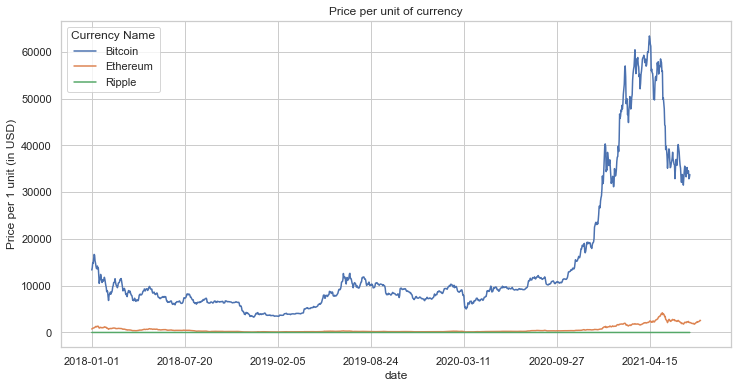

In [62]:
ax = crypto_comp[crypto_comp.date >= '2018-01-01'].groupby(['date','Currency Name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

As seen in the plot, Bitcoin is the crptocurrency which is the most popular, and has seen sharp fluctuations, proving the volatility of cryptocurrencies. 
A trend seen from this is that due to the COVID 19 pandemic, a lot of people turned to cryptocurrency trading in their free time, and we see an uptick in trading activity.

Comparing the trend for the year 2018

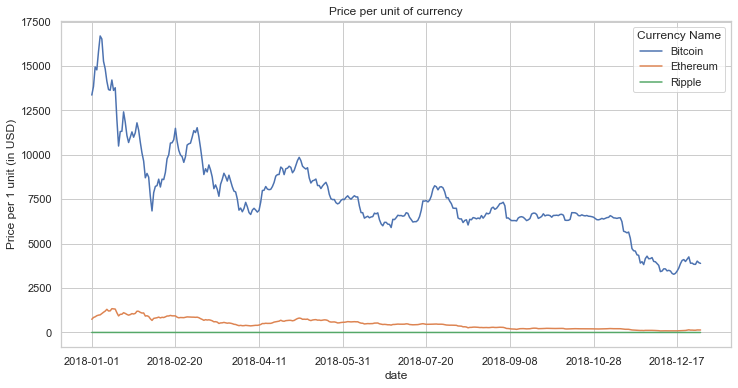

In [66]:
ax = crypto_comp[(crypto_comp.date >= '2018-01-01') & (crypto_comp.date <= '2018-12-31')].groupby(['date','Currency Name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

Comparing the trend for the year 2019

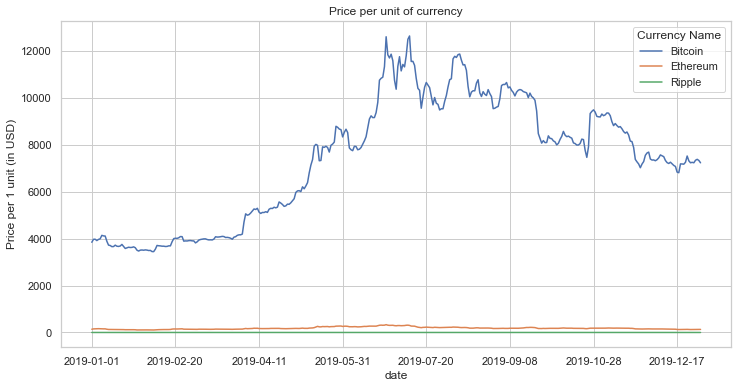

In [68]:
ax = crypto_comp[(crypto_comp.date >= '2019-01-01') & (crypto_comp.date <= '2019-12-31')].groupby(['date','Currency Name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

Comparing the trend for 2020

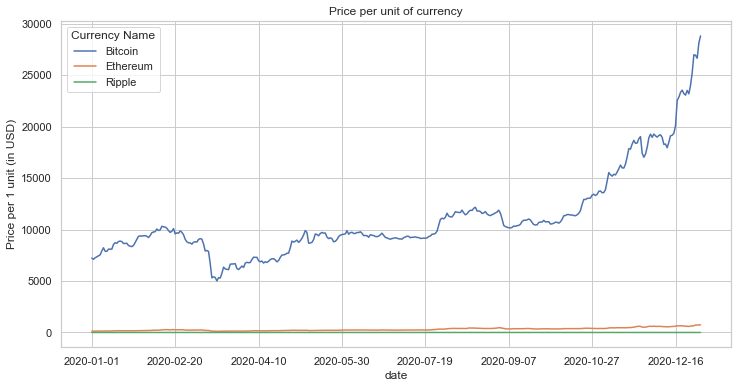

In [69]:
ax = crypto_comp[(crypto_comp.date >= '2020-01-01') & (crypto_comp.date <= '2020-12-31')].groupby(['date','Currency Name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

Comparing the trend for 2021

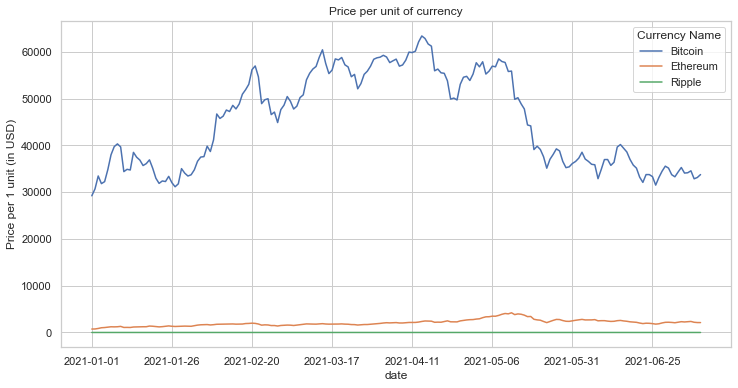

In [71]:
ax = crypto_comp[(crypto_comp.date >= '2021-01-01') & (crypto_comp.date <='2021-07-10')].groupby(['date','Currency Name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

Comparing the trends for new cryptocurrencies like Uniswap and Cardano

In [73]:
new_crypto = pd.concat([uniusd_data,cardano_data])

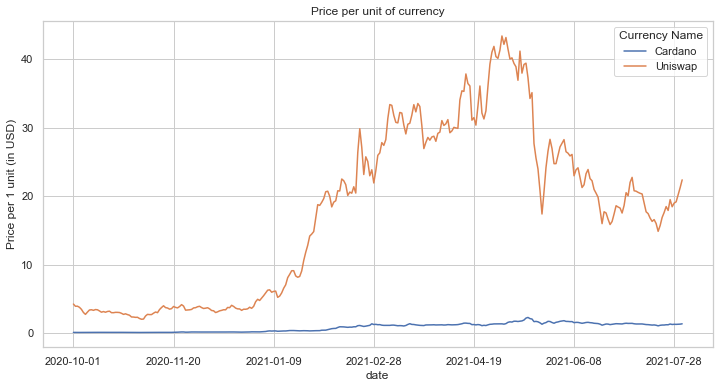

In [75]:
ax = new_crypto[(new_crypto.date >= '2020-10-01') & (new_crypto.date <='2021-08-01')].groupby(['date','Currency Name'])['close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

Plotting correlation of all these cryptocurrencies for the time duration 2020-2021

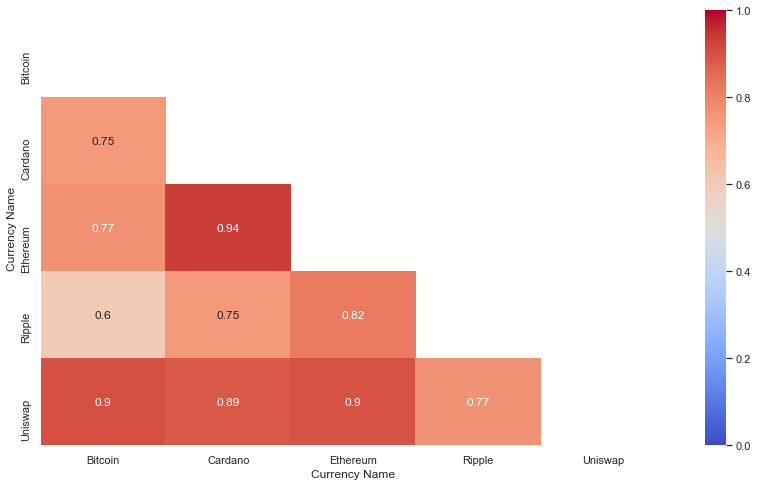

In [86]:
new_crypto_x = new_crypto[(new_crypto.date >= '2020-10-01') & (new_crypto.date <='2021-07-10')]
crypto_comp_x = crypto_comp[(crypto_comp.date >= '2020-10-01') & (crypto_comp.date <='2021-07-10')]
corr_df = pd.concat([new_crypto_x,crypto_comp_x])
corr_df = corr_df.groupby(['date', 'Currency Name'])['close'].last().unstack()
mask = np.triu(np.ones_like(corr_df.corr()))
plt.figure(figsize=(14,8))
sns.heatmap(corr_df.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True, mask=mask);

Plotting the ROI on bitcoin first

In [88]:
def plot_roi(amount, df):
    ((amount / df.iloc[0]) * df).plot(figsize=(12,8))

Assuming someone invested 5000 in Bitcoin in 2013, his ROI plot is as shown

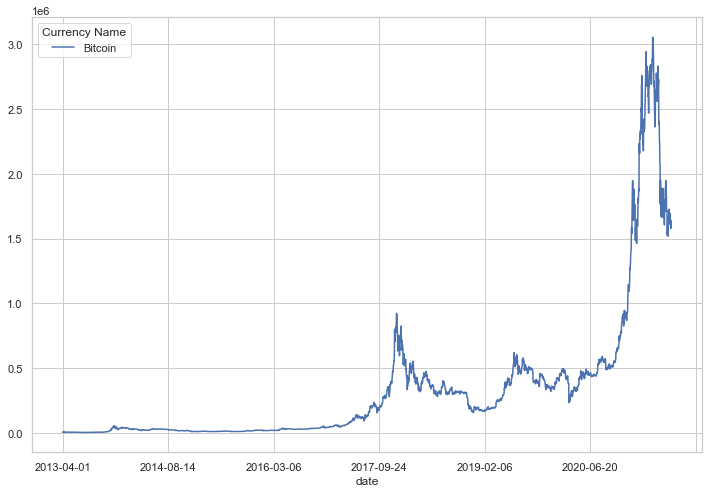

In [92]:
crypto_comp_y = crypto_comp.groupby(['date', 'Currency Name'])['close'].last().unstack()
plot_roi(5000,crypto_comp_y[['Bitcoin']])

 Hence, if someone invested 5000 usd in Bitcoin in 2013, his initial investment would be worth a bit more than 1.5 million
usd